# **Notebook Title: WRF Domain Plotting for IOP #10**
## This notebook performs the following tasks:
> - #### Reads in WRF output files, grabs the terrain hight, and lat/lon corners from each file, and makes a map that shows an outline for each domain region as well as the terrain height for each domain.

## Import packages
#### **Links to documentation for packages:**
> - #### [numpy](https://numpy.org/doc/1.21/) | [xarray](https://docs.xarray.dev/en/stable/) | [matplotlib](https://matplotlib.org/3.5.3/index.html) | [cartopy](https://scitools.org.uk/cartopy/docs/latest/) | 
> - #### Documentation for packages linked above should mostly correspond to the most stable versions, which may not be the exact versions used when creating this notebook.
> - #### Comments are also included in the actual code cells. Some comments contain links that point to places where I copied or adapted code to fit my needs. Although I tried to these include links for all instancs of copying, it is possible that there may code snippets that I did not do this for.

In [7]:
#----------------------------------------------------------------------------------------------------------------------
#Entire package imports
import numpy as np
import xarray as xr

#matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#Cartopy imports
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#----------------------------------------------------------------------------------------------------------------------

## **Create a map that shows the WRF Domains**
### Notes
> - #### See in-line commens for additional information.

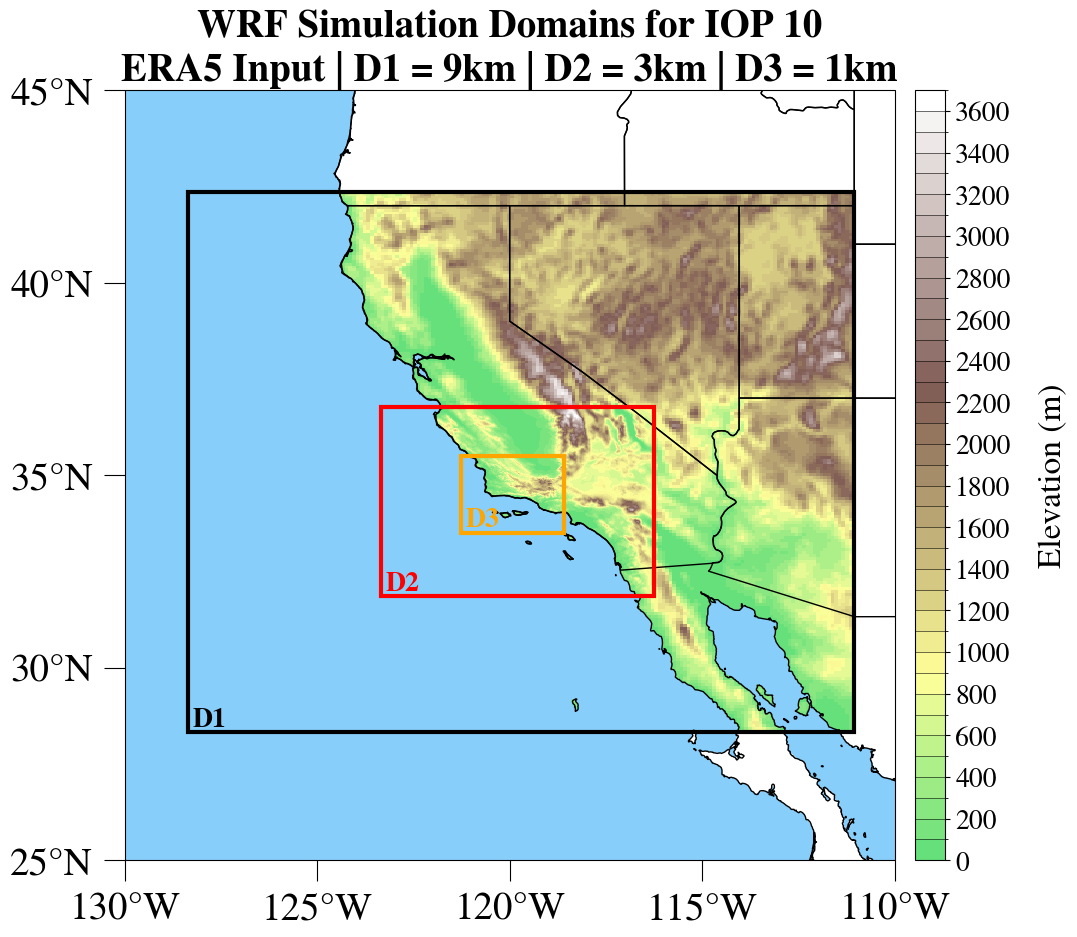

In [16]:
#----------------------------------------------------------------------------------------------------------------------
#Define font properties for different items
fontdict_title_labels    = {'fontsize': 28, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_tick_labels     = {'fontsize': 28, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_text_color_bar  = {'fontsize': 24, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}

#Define both map and data coordinate systems  
plot_crs = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

#Define cartopy axis
fig = plt.figure(figsize=(20,10), clear=True)
ax  = plt.axes(projection=plot_crs)

#Create variables to hold map extent values
lon_lat_extent = [-130, -110, 25, 45]
lon_lat_ticks=[-130, -110, 25, 45]
lon_lat_tick_num=[5, 5]

#Define map boundaries
left_lon  = lon_lat_extent[0]
right_lon = lon_lat_extent[1]
lower_lat = lon_lat_extent[2]
upper_lat = lon_lat_extent[3]

#Set extent of map
ax.set_extent((left_lon,right_lon,lower_lat,upper_lat), crs=plot_crs)

#Make map tick labels

#Longitude ticks
left_lon_tick  = lon_lat_ticks[0]
right_lon_tick = lon_lat_ticks[1]

#Latitude ticks
lower_lat_tick = lon_lat_ticks[2]
upper_lat_tick = lon_lat_ticks[3]

#Number of ticks we want. Serves as input to numpy "linspace" function below
lon_num_tick  = lon_lat_tick_num[0]
lat_num_tick  = lon_lat_tick_num[1]

#Define longitude and latitude ticks using "linspace"
map_xticks = np.linspace(left_lon_tick, right_lon_tick, num=lon_num_tick, endpoint=True).round(decimals=2) 
map_yticks = np.linspace(lower_lat_tick, upper_lat_tick, num=lat_num_tick, endpoint=True).round(decimals=2)

#Set xticks and xticklabels
ax.set_xticks(map_xticks, crs=plot_crs)
ax.set_xticklabels(map_xticks, fontdict=fontdict_tick_labels)

#Set yticks and yticklabels
ax.set_yticks(map_yticks, crs=plot_crs)
ax.set_yticklabels(map_yticks, fontdict=fontdict_tick_labels)

#Set tick parameters
#https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
#https://stackoverflow.com/questions/2969867/how-do-i-add-space-between-the-ticklabels-and-the-axes-in-matplotlib
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html
ax.grid(True)
ax.tick_params(axis='both', which='major', pad=8, length=15, 
           grid_linewidth=1, grid_linestyle='--', grid_color='black', grid_alpha=0)

#Add formatter to lon/lat ticks (degree symbol & direction label)
#https://scitools.org.uk/cartopy/docs/latest/gallery/tick_labels.html#sphx-glr-gallery-tick-labels-py
lon_format = LONGITUDE_FORMATTER
lat_format = LATITUDE_FORMATTER
ax.xaxis.set_major_formatter(lon_format)
ax.yaxis.set_major_formatter(lat_format)

#Add in ocean mask and coastline from Natural Earth (https://www.naturalearthdata.com/)
#https://stackoverflow.com/questions/20990381/how-to-add-custom-shapefile-to-map-using-cartopy
#Add in ocean mask, high resolution coastline, islands, state lines, and country lines all from Natural Earth
#https://www.naturalearthdata.com/
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue', zorder=1)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='10m', facecolor='None', zorder=1))
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces', scale='50m', facecolor='None', zorder=1))

#Add title
ax.set_title('WRF Simulation Domains for IOP 10\nERA5 Input | D1 = 9km | D2 = 3km | D3 = 1km', **fontdict_title_labels)

#Define WRF file paths
wrf_file_paths = ['/home/voyager-sbarc/wrf/wrf451/sundowners/swex2022/iop10/run_545_ERA5_1km/wrfout_d01_2022-05-11_18:00:00',
                 '/home/voyager-sbarc/wrf/wrf451/sundowners/swex2022/iop10/run_545_ERA5_1km/wrfout_d02_2022-05-11_18:00:00',
                 '/home/voyager-sbarc/wrf/wrf451/sundowners/swex2022/iop10/run_545_ERA5_1km/wrfout_d03_2022-05-11_18:00:00']

#Define colors for WRF domain boxes
wrf_colors = ['black', 'red', 'orange']

#for every WRF file we have, do the following
for wrf_file_index, (wrf_file, wrf_color) in enumerate(zip(wrf_file_paths, wrf_colors)):

    #Open WRF file
    wrf_ds = xr.open_dataset(wrf_file)

    #Get terrain height (units = meters), and associated longitude and latitude values
    height = wrf_ds['HGT'].isel(Time=0)
    lons   = height.XLONG
    lats   = height.XLAT

    #Get corners for every WRF domain
    #Only works for our West Coast domain currently
    lon_min = np.amin(lons)
    lon_max = np.amax(lons)
    lat_min = np.amin(lats)
    lat_max = np.amax(lats)
    
    #Add rectangle around zoomed region
    #https://scitools.org.uk/cartopy/docs/v0.5/matplotlib/introductory_examples/02.polygon.html
    ax.add_patch(mpatches.Rectangle(xy=[lon_min, lat_min], width=abs((lon_min - lon_max)), 
                                 height=abs((lat_min-lat_max)), edgecolor=wrf_color, linewidth=3,
                                 fill=False, alpha=1, zorder=10, transform=plot_crs))
    
    #Annotate rectangle with WRF domain number
    ax.text(lon_min+0.1, lat_min, f'D{wrf_file_index+1}',
            fontsize=20, fontname='Nimbus Roman', color=wrf_color, weight='bold',
            verticalalignment='bottom', horizontalalignment='left',
            transform=ccrs.PlateCarree())

    #If we are on the first WRF file, do the following:
    if wrf_file_index == 0:

        #Make a colormap that has land and ocean clearly delineated and of the same length (256 + 256)
        #https://github.com/dlnash/AR_types/blob/master/analysis/fig1_elevation.ipynb
        colors_land = plt.cm.terrain(np.linspace(0.35, 1, 256))
        terrain_map = mcolors.LinearSegmentedColormap.from_list('terrain_map', colors_land)

        #Make the norm
        norm_boundaries = np.arange(0,3800,100)
        norm = mcolors.BoundaryNorm(boundaries=norm_boundaries, ncolors=256)

        #Plot topography
        topo_plot = ax.pcolormesh(lons, lats, height, cmap=terrain_map, norm=norm, shading='auto', zorder=0)

        #Colorbar for topography
        #https://matplotlib.org/3.1.1/gallery/axes_grid1/demo_colorbar_with_axes_divider.html
        #Second Answer: https://stackoverflow.com/questions/30030328/correct-placement-of-colorbar-relative-to-geo-axes-cartopy
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='4%', pad=0.2, axes_class=plt.Axes)
        cbar = plt.colorbar(topo_plot, cax=cax, orientation='vertical', spacing='uniform', drawedges=True, ticks=norm_boundaries[::2])
        cbar.set_label('Elevation (m)', color='black', labelpad=20, **fontdict_text_color_bar)
        
        #Set font for colorbar tick lables
        #https://stackoverflow.com/questions/7257372/set-font-properties-to-tick-labels-with-matplot-lib/7280803
        ticks_font = matplotlib.font_manager.FontProperties(family='Nimbus Roman', style='normal', size=20, weight='normal', stretch='normal')
        for label in cbar.ax.get_yticklabels():
            label.set_fontproperties(ticks_font)
    else:
        #Plot topography
        topo_plot = ax.pcolormesh(lons, lats, height, cmap=terrain_map, norm=norm, shading='auto', zorder=0)
#----------------------------------------------------------------------------------------------------------------------
#Save figure
plt.savefig('./figures/figure_s2_wrf_domain.png', bbox_inches='tight', dpi=500)

#Show figure
plt.show()
#----------------------------------------------------------------------------------------------------------------------